<a href="https://colab.research.google.com/github/vhppacheco/Analise-Ibovespa/blob/main/S%C3%A9rie_Hist%C3%B3rica_Ibovespa_Retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings('ignore')

## Série histórica Ibov - Pontuação  - Yahoo Finance

In [2]:
TickerA='^BVSP'
df_ibov= wb.DataReader(TickerA, data_source='yahoo', start='2002-1-1')['Adj Close']
df_ibov= pd.DataFrame(df_ibov)
df_ibov

,Adj Close
Date,
2002-01-02,13872.0
2002-01-03,14265.0
2002-01-04,14332.0
2002-01-07,14379.0
2002-01-08,14168.0
...,...
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0


## Cálculo do Retorno do Ibovespa

In [3]:
df_ibov['simp_return'] = df_ibov['Adj Close'].pct_change()
df_ibov['simp_ret_cum'] = (df_ibov['simp_return'] + 1).cumprod()-1
df_ibov

,Adj Close,simp_return,simp_ret_cum
Date,,,
2002-01-02,13872.0,NaN,NaN
2002-01-03,14265.0,0.028330,0.028330
2002-01-04,14332.0,0.004697,0.033160
2002-01-07,14379.0,0.003279,0.036548
2002-01-08,14168.0,-0.014674,0.021338
...,...,...,...
2020-12-22,116348.0,0.002862,7.387255
2020-12-23,117857.0,0.012970,7.496035
2020-12-28,119051.0,0.010131,7.582108


In [4]:
df_ibov_descending = df_ibov.sort_values(by=['simp_return'], ascending=False)
df_ibov_descending

,Adj Close,simp_return,simp_ret_cum
Date,,,
2008-10-13,40829.0,0.146560,1.943267
2020-03-13,82678.0,0.139082,4.960063
2008-10-28,33387.0,0.134262,1.406791
2020-03-24,69729.0,0.096885,4.026600
2008-09-19,53055.0,0.095657,2.824611
...,...,...,...
2008-10-15,36833.0,-0.113931,1.655205
2020-03-09,86067.0,-0.121738,5.204369
2020-03-16,71168.0,-0.139215,4.130334


In [5]:
df_ibov = df_ibov.rename(columns={"Adj Close": "Pontuação Ibov", "simp_return": "Retorno Ibov", "simp_ret_cum": "Retorno Acumulado Ibov"})

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
 
fig = make_subplots(rows=3, cols=1)
 
fig.append_trace(go.Scatter(name = "Pontuação Ibov",
    y=df_ibov['Pontuação Ibov'],
    x=df_ibov.index,
), row=1, col=1)
 
fig.append_trace(go.Scatter(name = "Retorno Diário Ibov",
    y=round(df_ibov['Retorno Ibov']*100,2),
    x=df_ibov.index,
), row=2, col=1)
 
fig.append_trace(go.Scatter(name = "Retorno Acumulado Ibov",
    y=round(df_ibov['Retorno Acumulado Ibov']*100,2),
    x=df_ibov.index,
), row=3, col=1)
 
 
fig.update_layout(height=1000, width=1200, title_text="Série Histórica Ibovespa")
fig.show()

### Distribuição Normal do IBOV

In [7]:
x = df_ibov['Retorno Ibov'].dropna()
hist_data = [x]
group_labels = ['Normal']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.005)
fig.update_layout(title_text='Distribuição Normal dos Retornos do Ibov')
fig.show()

### Gráfico de Calor com os Retornos do Ibovespa

In [9]:
pip install monthly-returns-heatmap

  Created wheel for monthly-returns-heatmap: filename=monthly_returns_heatmap-0.0.11-cp36-none-any.whl size=8102 sha256=b58e72008a90935c44a908cb825df8cf0b1e92b50686811289aa48dbda700884
  Stored in directory: /root/.cache/pip/wheels/98/e6/a6/5e8e316bb2ddc8bf692b75d63c5db9208d82aaecacb1e1ff72
Successfully built monthly-returns-heatmap


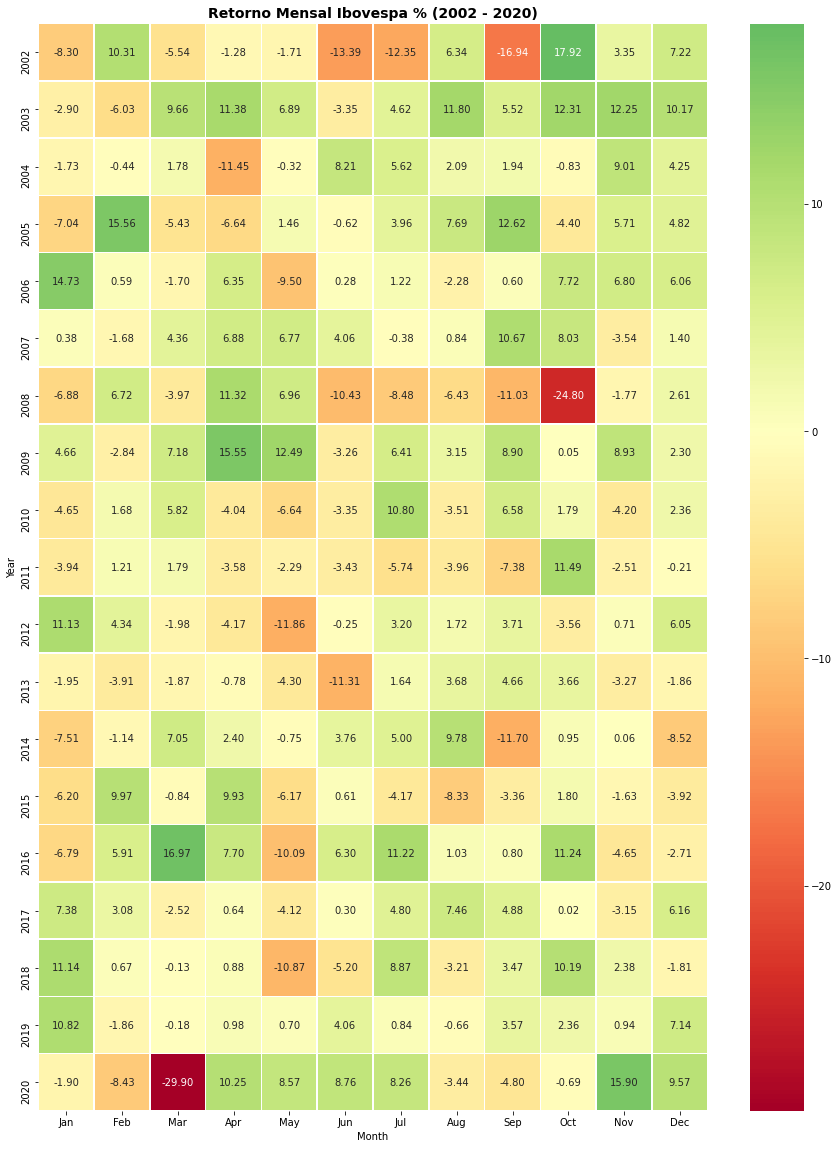

In [10]:
import monthly_returns_heatmap as mrh
retorno = df_ibov['Retorno Ibov']
mrh.plot(retorno,figsize= (15,20), title = 'Retorno Mensal Ibovespa % (2002 - 2020)')